In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit
from tpot import TPOTRegressor
import seaborn as sns

%matplotlib inline

/usr/local/share/jupyteruser/.virtualenvs/jbeipython3/lib/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The goal of this notebook is to study which is more accurate, a random forest or TPOT, for predicting a single flux, Biomass, from transcripts in *R. opacus*.

Load the data for just biomass, reaction 2142:

In [2]:
X = np.transpose(np.loadtxt("../data/transcripts.csv",delimiter=',', skiprows=1,usecols=range(1,53)))
y_full = np.transpose(np.loadtxt("../data/fluxes.csv",delimiter=',', skiprows=1,usecols=range(1,53)))
y = np.copy(y_full[:,2142])

First up is a random forest:

RF Error 294.737623795 1.11660161573
rf Scores [-0.16865234  0.9149752   0.89463271  0.72724631  0.16397245 -1.60626646
  0.93874717  0.63506801  0.78087972  0.80859993]


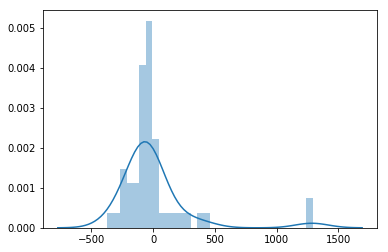

In [3]:
rf = RandomForestRegressor(n_estimators=500, oob_score=False, random_state=0,n_jobs=-1)
scores = cross_val_score(rf,X,y=y,scoring='r2',cv=10)
y_p = cross_val_predict(rf,X,y=y,cv=10)
y_err = [ya - yp for ya,yp in zip(y,y_p)]
sns.distplot(y_err)
print('RF Error',np.std(y_err),np.mean(y_err))
print('rf Scores',scores)

Now let's run the TPOT model to see if it is beter than the Random Forest regressor. Warning, this takes several days to compute.

In [ ]:
tpot = TPOTRegressor(generations=30, population_size=50,verbosity=2)
tpot_model = tpot.fit(X,y).fitted_pipeline_
scores = cross_val_score(tpot_model,X,y=y,scoring='r2',cv=10)
y_p = cross_val_predict(tpot_model,X,y=y,cv=10)
y_err = [ya - yp for ya,yp in zip(y,y_p)]
sns.distplot(y_err)
print('TPOT Error',np.std(y_err),np.mean(y_err))
print('TPOT Scores',scores)

Version 0.8.3 of tpot is outdated. Version 0.9.0 was released Wednesday September 27, 2017.


Optimization Progress:   6%|▌         | 93/1550 [18:46:41<20:27:23, 50.54s/pipeline]    

Generation 1 - Current best internal CV score: 9937.717046229183


Optimization Progress:   9%|▉         | 139/1550 [19:00:04<4:51:40, 12.40s/pipeline] 

Generation 2 - Current best internal CV score: 9937.717046229183


Optimization Progress:  10%|▉         | 154/1550 [19:04:14<7:51:34, 20.27s/pipeline]

In [1]:
import pytorch

ImportError: No module named 'pytorch'